## Write a script that parses momentum values to determine the mean value of a mass

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import log10, floor
# the givens
MASS_A = 2
MASS_B = 1
mass_c_vals = [] # becomes a list of calculated masses
Nbins = 50 # keep those histograms high-res!

In [2]:
def calc_p(arg):
    # i know it's gross but it's only written once
    return np.sqrt(MASS_A**2 - 2*MASS_A*np.sqrt(MASS_B**2+ arg**2)+MASS_B**2)

In [3]:
# this rounds to one sig fig
def round_to_1(x):
    answer = round(x, -int(floor(log10(abs(x)))))
    if answer >= 1:
        return int(answer)
    else:
        return answer
    
# this takes two floats and returns a string of them in standard form:
def standard_form(base, error):
    return 'Standard form: ' + '{:.{}f}'.format(base, len(str(round_to_1(error))) -2)+ ' +/- '+ str(round_to_1(error))

Mean mass: 0.19955834820367702 eV/c^2
StDev: 0.009946874560319412 eV/c^2
Standard form: 0.20 +/- 0.01 eV/c^2


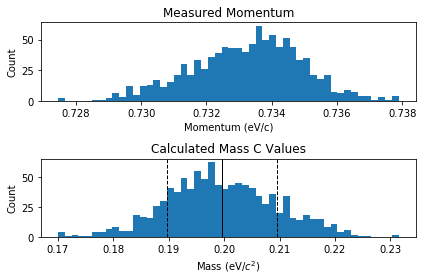

In [4]:
filename = 'pBs_2body_decay.txt'
q0s = np.loadtxt(filename)

fig, axs = plt.subplots(2,1)

# underscore assigned here so that the array is never printed
_ = axs[0].hist(q0s, bins=Nbins)
axs[0].set_title('Measured Momentum')
axs[0].set_xlabel('Momentum (eV/c)')
axs[0].set_ylabel('Count')


for entry in q0s:
    mass_c_vals.append(calc_p(entry))
print('Mean mass:', np.mean(mass_c_vals), 'eV/c^2')
print('StDev:', np.std(mass_c_vals), 'eV/c^2')

# round error to one sig fig
# round base measurment to that level of precision
round_dev = round_to_1(np.std(mass_c_vals))
round_base = round(np.mean(mass_c_vals), len(str(round_dev)) -1)

# print mean +/- standard dev using standard form via string formatting
print(standard_form(np.mean(mass_c_vals), np.std(mass_c_vals)), 'eV/c^2')

# underscore assigned here for same reason as above
_ = axs[1].hist(mass_c_vals, bins = Nbins)
axs[1].set_title('Calculated Mass C Values')
axs[1].set_xlabel('Mass (eV/$c^2$)')
axs[1].set_ylabel('Count')

# include lines for mean and stdev:
axs[1].axvline(x=np.mean(mass_c_vals),color='black',linewidth=1)
axs[1].axvline(x=np.mean(mass_c_vals)+np.std(mass_c_vals),color='black',linewidth=1,linestyle='dashed')
axs[1].axvline(x=np.mean(mass_c_vals)-np.std(mass_c_vals),color='black',linewidth=1,linestyle='dashed')

plt.tight_layout()

plt.savefig('./example_1D.pdf',bbox_inches='tight', transparent=True)
plt.show()
